In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
pd.options.display.max_rows =12

# Load the Data and Sanity Check

https://www.auburn.edu/academic/forestry_wildlife/fire/weather_elements.htm


In [2]:
full_events=pd.read_csv('wildfire_events_full (1).csv',error_bad_lines=False)

C:\Users\josht\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,18,31,44,57,70,83,96,109,122,135,148,161,174,187,200,213,226,239,252,265,278,291,304,317,330,343,356,369,382,395,408,421,434,447,460,473,486,499,512,525,538,551,564,577,590,603,616,629,642,655,668,681,694,707,720,733,746,759,772,785,798,811,824,837,850,863,876,889,902,915,928,941,954,967,980,993,1006,1019,1032,1045,1058,1071,1084,1097,1110,1123,1136,1149,1162,1175,1188,1201,1214,1227,1240,1253,1266,1279,1292,1305,1318,1331,1344,1357,1370,1383,1396,1409,1422,1435,1448,1461,1474,1487,1500,1513,1526,1539,1552,1565,1578,1591,1604,1617,1630,1643,1656,1669,1682,1695,1708,1721,1734,1747,1760,1772,1784,1796,1808,1821,1834,1847,1860,1873,1886,1899,1912,1925,1938,1951,1964,1977,1990,2003,2016,2029,2044,2057,2070,2083,2096,2109,2122,2135,2148,2161,2174,2187,2200,2213,2226,2253,2266,2279,2292,2305,2318,2331,2372,2385,2398,2411,2424,2437,2450,2463,2476,2489,2502,2515,2528,2541,2554,2567,2580,2

In [3]:
#drop row with NA in 'Size' and show pandas dataframe
full_events = full_events.dropna(subset=['Size', 'summary_336']).drop('Costs', axis = 1)

In [4]:
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='windGust')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='windBearing')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='summary')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='precipType')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='visibility')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='uvIndex')))]
full_events = full_events[full_events.columns.drop(list(full_events.filter(regex='cloudCover')))]

full_events.head()

,_id,Event,Latitude,Longitude,temperature_336,apparentTemperature_336,dewPoint_336,humidity_336,pressure_336,windSpeed_336,...,humidity358,pressure358,windSpeed358,temperature359,apparentTemperature359,dewPoint359,humidity359,pressure359,windSpeed359,Size
0,"ObjectId(""5caeb38ca6e44a5b0027cc15"")",CA-CNF-000102,33.6681,-117.50139,46.87,46.87,45.21,0.94,1015.68,0.31,...,0.71,1023.04,0.49,41.75,41.75,33.32,0.72,1023.10,0.28,100.0
1,"ObjectId(""5caeb38ca6e44a5b0027cc16"")",CA-MVU-955,33.0333,-116.83389,42.15,42.15,16.90,0.36,1016.17,0.48,...,0.93,1015.43,0.23,46.61,46.61,44.74,0.93,1015.29,1.74,25.0
3,"ObjectId(""5caeb38ca6e44a5b0027cc18"")",CA-RRU-009418,33.6172,-116.15083,55.44,55.44,20.01,0.25,1014.73,7.88,...,0.39,1021.87,3.25,61.15,61.15,39.22,0.44,1022.29,3.87,15.0
4,"ObjectId(""5caeb38ca6e44a5b0027cc19"")",CA-RRU-10403,34.8678,-117.66306,43.39,39.90,28.43,0.55,1016.81,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400.0
5,"ObjectId(""5caeb38ca6e44a5b0027cc1a"")",CA-CDD-2100,36.0881,-116.27306,42.82,40.58,15.06,0.32,NaN,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0


In [5]:
full_events.shape

(1908, 4271)

In [15]:
dropped = full_events.dropna()
dropped = dropped.reset_index(drop=True)
dropped.shape

(681, 4273)

In [6]:
#check for duplicates
if len(full_events['Event'].unique())==len(full_events['_id'].unique()):
  print('There is no duplicates in number of fires')
else:
    print('Mismatch found')

There is no duplicates in number of fires


## Visualization via heatmap

In [7]:
map = folium.Map(location=[37.7749, -122.4194],
                    zoom_start = 8) 


full_events['Latitude'] = full_events['Latitude'].astype(float)
full_events['Longitude'] = full_events['Longitude'].astype(float)

# Filtering heatdata (displaying only above average temp)
average_size=np.mean(full_events['Size'])
heat_df = full_events[full_events['Size']>=average_size]
heat_df = full_events[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])


heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]


HeatMap(heat_data).add_to(map)


map

## Data Cleaning

### Add column with log transformation of size

In [17]:
#Add column of log sizes
log_sizes = np.log(dropped.Size)
dropped['log_sizes'] = log_sizes
dropped['log_sizes']

0      4.605170
1      3.218876
2      6.733402
3      6.793466
4      2.708050
5      4.605170
         ...   
675    9.656243
676    8.707648
677    6.045005
678    7.209340
679    5.579730
680    8.125631
Name: log_sizes, Length: 681, dtype: float64

[Text(0.5, 0, 'Fire Size (log acres)'),
 Text(0.5, 1.0, 'Histogram of Fire Sizes')]

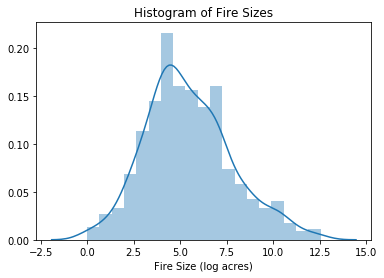

In [18]:
sns.distplot(log_sizes).set(title= 'Histogram of Fire Sizes', xlabel= 'Fire Size (log acres)')

### Add column with fire size labels

As to size of wildfire:/
Class A - one-fourth acre or less;
Class B - more than one-fourth acre, but less than 10 acres;
Class C - 10 acres or more, but less than 100 acres;
Class D - 100 acres or more, but less than 300 acres;
Class E - 300 acres or more, but less than 1,000 acres;
Class F - 1,000 acres or more, but less than 5,000 acres;
Class G - 5,000 acres or more.
https://www.nwcg.gov/term/glossary/size-class-of-fire

In [19]:
#Run a for loop to add a label to each fire based on government classification of fire sizes
fire_category = []
for size in dropped.Size:
    if float(size)<=0.25:
        fire_category.append('class_a')
    elif float(size) <10 and float(size) >0.25:
        fire_category.append('class_b')
    elif float(size) >=10 and float(size) <100:
        fire_category.append('class_c')
    elif float(size) >=100 and float(size) <300:
        fire_category.append('class_d')
    elif float(size) >= 300 and float(size) <1000:
        fire_category.append('class_e')
    elif float(size) >= 1000 and float(size) <5000:
        fire_category.append('class_f')
    elif float(size) >=5000:
        fire_category.append('class_g') 

In [20]:
#Add column with classification of fire sizes
dropped['size_category'] = fire_category
dropped.size_category

0      class_d
1      class_c
2      class_e
3      class_e
4      class_c
5      class_d
        ...   
675    class_g
676    class_g
677    class_e
678    class_f
679    class_d
680    class_f
Name: size_category, Length: 681, dtype: object

### Aggregate features by days

In [21]:
#Create a list of features (might use this string for a future for loop or a function -josh)
features = ['temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed']

#first create intervals to combine data between certain hours
bins = np.arange(0, 697, 24)

cleaned_df = dropped[['_id','Event', 'Latitude','Longitude','Size','log_sizes','size_category']]

#Create a list of strings that marks each day to add to the word 'temperature'
days = ['_14','_13', '_12', '_11', '_10', '_9', '_8', '_7', '_6', '_5', '_4', '_3', '_2', '_1',
'0', '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14']

for feature in features:
    feature_by_day = [] #empty list to store all info for each day
    for i in np.arange(len(bins)-1):
        feature_df = dropped.filter(regex=feature)
        feature_daily_avg = np.array(feature_df.iloc[:, bins[i]:bins[i+1]].mean(axis=1))
        feature_by_day.append(feature_daily_avg)
        for j in np.arange(len(feature_by_day)):
            word = feature + days[j]
            cleaned_df[word] = feature_by_day[j]
cleaned_df.head()

C:\Users\josht\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,_id,Event,Latitude,Longitude,Size,log_sizes,size_category,temperature_14,temperature_13,temperature_12,...,windSpeed5,windSpeed6,windSpeed7,windSpeed8,windSpeed9,windSpeed10,windSpeed11,windSpeed12,windSpeed13,windSpeed14
0,"ObjectId(""5caeb38ca6e44a5b0027cc15"")",CA-CNF-000102,33.6681,-117.50139,100.0,4.605170,class_d,48.221250,52.325833,55.353750,...,3.646667,2.427500,4.275833,1.949583,2.096250,1.935833,1.428750,2.269583,1.633333,1.618333
1,"ObjectId(""5caeb38ca6e44a5b0027cc16"")",CA-MVU-955,33.0333,-116.83389,25.0,3.218876,class_c,48.305833,46.069583,44.835417,...,1.526667,1.640417,1.833333,5.261250,4.941250,1.846250,2.011250,7.476250,5.292083,2.992083
2,"ObjectId(""5caeb38ca6e44a5b0027cc1b"")",CA-BDU-2403,37.3683,-118.35833,840.0,6.733402,class_e,40.872500,41.335833,49.464583,...,3.337500,2.846250,5.654583,4.394583,2.933750,2.271250,2.413333,2.819167,5.687500,6.950417
3,"ObjectId(""5caeb38ca6e44a5b0027cc27"")",CA-RRU-29527,33.8692,-117.68361,892.0,6.793466,class_e,55.987500,59.727083,60.797917,...,5.224583,4.270417,2.530000,4.327917,5.611250,3.257917,3.257083,3.121667,2.863750,2.850417
4,"ObjectId(""5caeb38ca6e44a5b0027cc2c"")",CA-MVU-003100,32.8689,-116.86667,15.0,2.708050,class_c,54.468750,53.435833,55.019167,...,3.899167,4.002500,3.761667,6.027083,3.868333,2.800000,3.557500,3.774583,4.250417,3.922083


In [22]:
cleaned_df.shape

(681, 181)

In [25]:
cleaned_df.to_csv('cleaned_wildfire_data.csv')